# Utilização do PyQGIS no Jupyter

### Webografia
* https://lerryws.xyz/posts/PyQGIS-in-Jupyter-Notebook
* https://github.com/3liz/qgis-nbextension/blob/master/examples/render_layer.py
* https://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/

### Primeiro ensaio
Os paths específicos da versão de desenvolvimento instalada no meu computador.

In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/ze_1_/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/ze_1_/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
covid_gpkg = "covid-pt-latest.gpkg" + "|layername=concelho"
vlayer = QgsVectorLayer(covid_gpkg, "Concelhos", "ogr")
if not vlayer.isValid():
    print("Layer failed to load!")
else:
    QgsProject.instance().addMapLayer(vlayer)
    print("Layer loaded")

Layer loaded


In [3]:
covid_gpkg = "covid-pt-latest.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


In [4]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]

In [5]:
for c in concelho.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_03/04/2020"]))

Em ÁGUEDA há 22 caso(s) confirmados
Em ALBERGARIA-A-VELHA há 52 caso(s) confirmados
Em ANADIA há 7 caso(s) confirmados
Em AROUCA há 14 caso(s) confirmados
Em AVEIRO há 130 caso(s) confirmados
Em CASTELO DE PAIVA há 3 caso(s) confirmados
Em ESPINHO há 28 caso(s) confirmados
Em ESTARREJA há 33 caso(s) confirmados
Em SANTA MARIA DA FEIRA há 187 caso(s) confirmados
Em ÍLHAVO há 25 caso(s) confirmados
Em MEALHADA há 7 caso(s) confirmados
Em MURTOSA há 7 caso(s) confirmados
Em OLIVEIRA DE AZEMÉIS há 75 caso(s) confirmados
Em OLIVEIRA DO BAIRRO há 10 caso(s) confirmados
Em OVAR há 220 caso(s) confirmados
Em SÃO JOÃO DA MADEIRA há 31 caso(s) confirmados
Em SEVER DO VOUGA há NULL caso(s) confirmados
Em VAGOS há 7 caso(s) confirmados
Em VALE DE CAMBRA há 25 caso(s) confirmados
Em ALJUSTREL há NULL caso(s) confirmados
Em ALMODÔVAR há NULL caso(s) confirmados
Em ALVITO há NULL caso(s) confirmados
Em BARRANCOS há NULL caso(s) confirmados
Em BEJA há 3 caso(s) confirmados
Em CASTRO VERDE há NULL caso

In [6]:
expr_sem_casos = QgsExpression( " \"confirmados_concelho_03/04/2020\" IS NULL " )
virgens = list(concelho.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for c in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

Em SEVER DO VOUGA não há pelos menos 3 casos confirmados
Em ALJUSTREL não há pelos menos 3 casos confirmados
Em ALMODÔVAR não há pelos menos 3 casos confirmados
Em ALVITO não há pelos menos 3 casos confirmados
Em BARRANCOS não há pelos menos 3 casos confirmados
Em CASTRO VERDE não há pelos menos 3 casos confirmados
Em CUBA não há pelos menos 3 casos confirmados
Em FERREIRA DO ALENTEJO não há pelos menos 3 casos confirmados
Em MÉRTOLA não há pelos menos 3 casos confirmados
Em MOURA não há pelos menos 3 casos confirmados
Em ODEMIRA não há pelos menos 3 casos confirmados
Em OURIQUE não há pelos menos 3 casos confirmados
Em VIDIGUEIRA não há pelos menos 3 casos confirmados
Em CABECEIRAS DE BASTO não há pelos menos 3 casos confirmados
Em TERRAS DE BOURO não há pelos menos 3 casos confirmados
Em ALFÂNDEGA DA FÉ não há pelos menos 3 casos confirmados
Em FREIXO DE ESPADA À CINTA não há pelos menos 3 casos confirmados
Em MIRANDA DO DOURO não há pelos menos 3 casos confirmados
Em MOGADOURO não h

In [7]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

In [8]:
xt = concelho.extent()
print(xt.height())
print(xt.width())
width  = 300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

576488.5713999991
281320.48860000004
Gerar mapa com 300 por 614


In [9]:
from IPython.display import Image

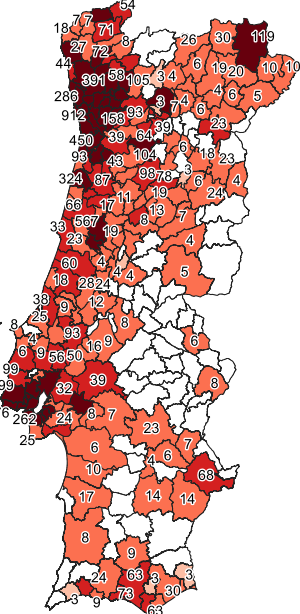

In [10]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [ ]:
qgs.exitQgis()